In [1]:
# 필요한 패키지와 라이브러리를 가져옴
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
mpl.rc('font',family='Malgun Gothic')   # 맑은 고딕으로 그래프한글설정

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

import seaborn as sns

In [3]:
import pandas as pd

In [49]:
#데이터 불러오기(암발생자수)
df = pd.read_csv("../data/03_암발생자수_.csv", encoding='cp949')
df.head()

,24개 암종별,성별,연령별,2019,2019.1
0,24개 암종별,성별,연령별,발생자수 (명),조발생률 (명/10만명)
1,모든 암(C00-C96),계,계,254718,496.2
2,모든 암(C00-C96),계,0-4세,406,21.3
3,모든 암(C00-C96),계,5-9세,220,9.5
4,모든 암(C00-C96),계,10-14세,300,13.0


In [50]:
# 열명 변경
# "암종별", "성별", "연령별", "발생자수", "조발생률"
df.columns = ["암종별", "성별", "연령별", "발생자수", "조발생률"]

# 열 데이터 타입 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1501 entries, 0 to 1500
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   암종별     1501 non-null   object
 1   성별      1501 non-null   object
 2   연령별     1501 non-null   object
 3   발생자수    1501 non-null   object
 4   조발생률    1501 non-null   object
dtypes: object(5)
memory usage: 58.8+ KB


In [9]:
df.index

RangeIndex(start=0, stop=1501, step=1)

In [39]:
df.columns

Index(['암종별', '성별', '연령별', '발생자수', '조발생률'], dtype='object')

In [11]:
# 행, 열 조회
df.loc[0, '암종별']

'24개 암종별'

In [51]:
df = df.loc[1:, :]
df

,암종별,성별,연령별,발생자수,조발생률
1,모든 암(C00-C96),계,계,254718,496.2
2,모든 암(C00-C96),계,0-4세,406,21.3
3,모든 암(C00-C96),계,5-9세,220,9.5
4,모든 암(C00-C96),계,10-14세,300,13.0
5,모든 암(C00-C96),계,15-19세,583,21.4
...,...,...,...,...,...
1496,기타 암(Re. C00-C96),여자,70-74세,1096,107.6
1497,기타 암(Re. C00-C96),여자,75-79세,1357,146.3
1498,기타 암(Re. C00-C96),여자,80-84세,1420,212.1
1499,기타 암(Re. C00-C96),여자,85세이상,1273,243.6


In [15]:
#특정 행, 열 자료 추출
df.loc[[1,3],['암종별', '발생자수']]

,암종별,발생자수
1,모든 암(C00-C96),254718
3,모든 암(C00-C96),220


In [12]:
df.iloc[0, 0]

'24개 암종별'

In [8]:
# 특정 변수 조회
df['암종별']

0                 24개 암종별
1           모든 암(C00-C96)
2           모든 암(C00-C96)
3           모든 암(C00-C96)
4           모든 암(C00-C96)
              ...        
1496    기타 암(Re. C00-C96)
1497    기타 암(Re. C00-C96)
1498    기타 암(Re. C00-C96)
1499    기타 암(Re. C00-C96)
1500    기타 암(Re. C00-C96)
Name: 암종별, Length: 1501, dtype: object

In [16]:
import numpy as np

In [17]:
df['발생자수'] = np.where(df['발생자수'] == '-', 0, df['발생자수'] )
df['조발생률'] = np.where(df['조발생률'] == '-', 0, df['조발생률'] )

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 1 to 1500
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   암종별     1500 non-null   object
 1   성별      1500 non-null   object
 2   연령별     1500 non-null   object
 3   발생자수    1500 non-null   object
 4   조발생률    1500 non-null   object
dtypes: object(5)
memory usage: 58.7+ KB


In [19]:
#데이터타입변경1
df['발생자수'] = df['발생자수'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 1 to 1500
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   암종별     1500 non-null   object
 1   성별      1500 non-null   object
 2   연령별     1500 non-null   object
 3   발생자수    1500 non-null   int32 
 4   조발생률    1500 non-null   object
dtypes: int32(1), object(4)
memory usage: 52.9+ KB


In [20]:
#데이터타입변경2
df['조발생률'] = pd.to_numeric(df['조발생률'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 1 to 1500
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   암종별     1500 non-null   object 
 1   성별      1500 non-null   object 
 2   연령별     1500 non-null   object 
 3   발생자수    1500 non-null   int32  
 4   조발생률    1500 non-null   float64
dtypes: float64(1), int32(1), object(3)
memory usage: 52.9+ KB


In [ ]:
#암종류
lt = list(df['암종별'].unique())
lt = [s[-3:-1] for s in lt]
lt

In [ ]:
lt = [int(s) for s in lt]
lt

In [52]:
def funCol(col, df) :
    temp = list(df[col])
    temp = [float(s.replace('-', '0')) for s in temp]
    df[col] = temp 

In [53]:
for c in ['발생자수', '조발생률'] :
    funCol(c, df) 

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 1 to 1500
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   암종별     1500 non-null   object 
 1   성별      1500 non-null   object 
 2   연령별     1500 non-null   object 
 3   발생자수    1500 non-null   float64
 4   조발생률    1500 non-null   float64
dtypes: float64(2), object(3)
memory usage: 58.7+ KB


In [37]:
temp = list(df['발생자수'])
temp = [ int(s.replace('-', '0')) for s in temp]
df['발생자수'] = temp
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 1 to 1500
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   암종별     1500 non-null   object
 1   성별      1500 non-null   object
 2   연령별     1500 non-null   object
 3   발생자수    1500 non-null   int64 
 4   조발생률    1500 non-null   object
dtypes: int64(1), object(4)
memory usage: 58.7+ KB


In [40]:
temp = list(df['조발생률'])
temp = [ float(s.replace('-', '0')) for s in temp]
df['조발생률'] = temp
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 1 to 1500
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   암종별     1500 non-null   object 
 1   성별      1500 non-null   object 
 2   연령별     1500 non-null   object 
 3   발생자수    1500 non-null   int64  
 4   조발생률    1500 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 58.7+ KB


In [55]:
df.head()

,암종별,성별,연령별,발생자수,조발생률
1,모든 암(C00-C96),계,계,254718.0,496.2
2,모든 암(C00-C96),계,0-4세,406.0,21.3
3,모든 암(C00-C96),계,5-9세,220.0,9.5
4,모든 암(C00-C96),계,10-14세,300.0,13.0
5,모든 암(C00-C96),계,15-19세,583.0,21.4


In [66]:
df1 = df[(df['암종별'] == '모든 암(C00-C96)') & (df['연령별'] != '계') & (df['성별'] == '계')]
df1 = df1[['연령별','발생자수','조발생률']]
df1

,연령별,발생자수,조발생률
2,0-4세,406.0,21.3
3,5-9세,220.0,9.5
4,10-14세,300.0,13.0
5,15-19세,583.0,21.4
6,20-24세,1344.0,40.1
7,25-29세,2896.0,84.4
8,30-34세,4652.0,147.6
9,35-39세,8845.0,223.3
10,40-44세,12427.0,322.2
11,45-49세,17759.0,396.5


In [67]:
df1 = df1.set_index('연령별')
df1

,발생자수,조발생률
연령별,,
0-4세,406.0,21.3
5-9세,220.0,9.5
10-14세,300.0,13.0
15-19세,583.0,21.4
20-24세,1344.0,40.1
25-29세,2896.0,84.4
30-34세,4652.0,147.6
35-39세,8845.0,223.3
40-44세,12427.0,322.2


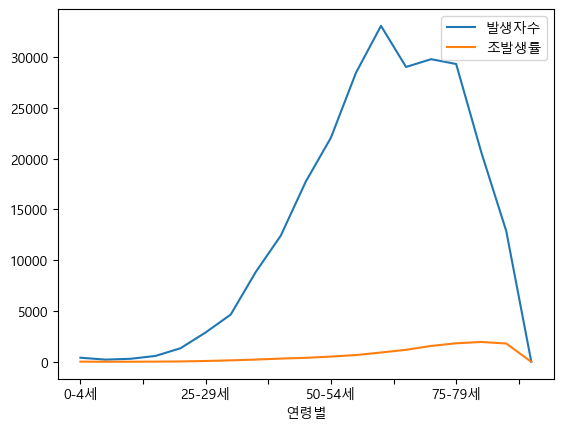

In [68]:
df1.plot()
plt.show()

In [69]:
df.head()

,암종별,성별,연령별,발생자수,조발생률
1,모든 암(C00-C96),계,계,254718.0,496.2
2,모든 암(C00-C96),계,0-4세,406.0,21.3
3,모든 암(C00-C96),계,5-9세,220.0,9.5
4,모든 암(C00-C96),계,10-14세,300.0,13.0
5,모든 암(C00-C96),계,15-19세,583.0,21.4


In [80]:
df2 = df[(df['연령별'] != '계') & (df['암종별'] !='모든 암(C00-C96)') & (df['성별'] !='계')]
df2

,암종별,성별,연령별,발생자수,조발생률
82,"입술, 구강 및 인두(C00-C14)",남자,0-4세,0.0,0.0
83,"입술, 구강 및 인두(C00-C14)",남자,5-9세,1.0,0.1
84,"입술, 구강 및 인두(C00-C14)",남자,10-14세,3.0,0.3
85,"입술, 구강 및 인두(C00-C14)",남자,15-19세,7.0,0.5
86,"입술, 구강 및 인두(C00-C14)",남자,20-24세,18.0,1.0
...,...,...,...,...,...
1496,기타 암(Re. C00-C96),여자,70-74세,1096.0,107.6
1497,기타 암(Re. C00-C96),여자,75-79세,1357.0,146.3
1498,기타 암(Re. C00-C96),여자,80-84세,1420.0,212.1
1499,기타 암(Re. C00-C96),여자,85세이상,1273.0,243.6


In [72]:
df2.groupby(['암종별', '성별']).mean()[['발생자수', '조발생률']]

발생자수       조발생률
암종별          성별                        
간(C22)       계    821.315789  38.810526
             남자   607.421053  63.189474
             여자   213.894737  20.931579
갑상선(C73)     계   1614.526316  46.357895
             남자   395.578947  23.210526
...                      ...        ...
호지킨 림프종(C81) 남자     9.526316   0.678947
             여자     6.684211   0.515789
후두(C32)      계     64.315789   3.115789
             남자    60.736842   7.105263
             여자     3.578947   0.347368

[75 rows x 2 columns]

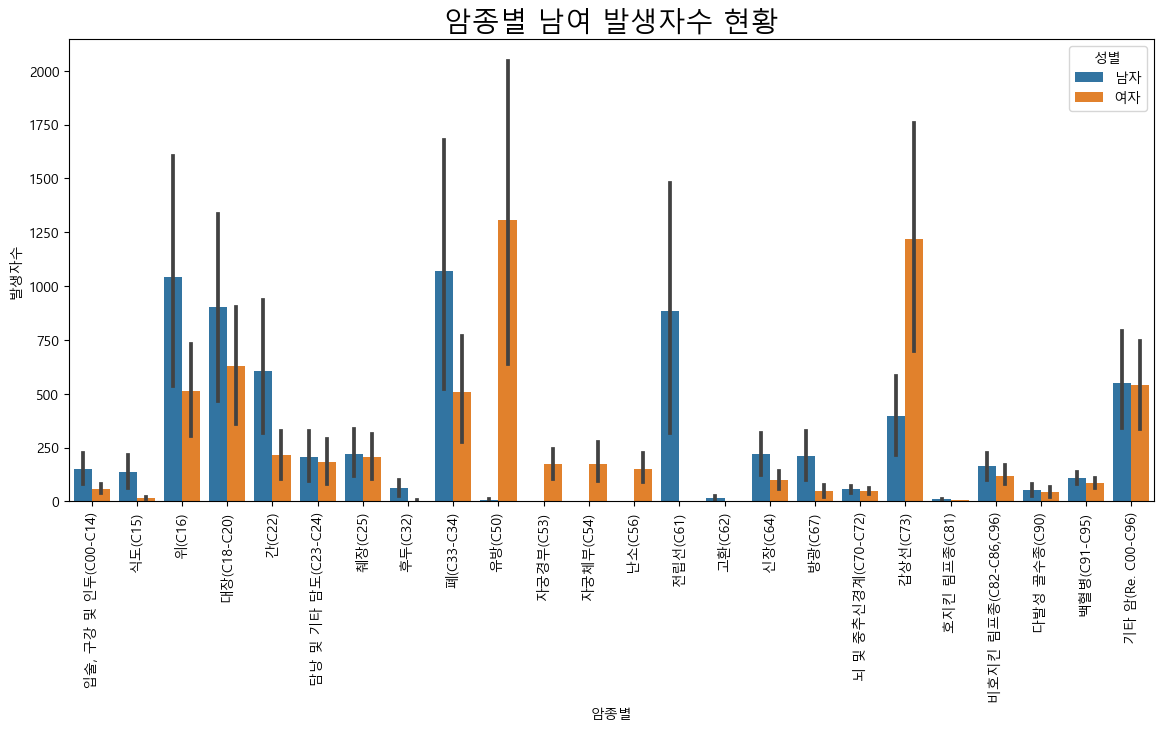

In [88]:
plt.figure(figsize=(14, 6))
sns.barplot(x='암종별', y='발생자수', hue='성별', data=df2)
plt.title('암종별 남여 발생자수 현황', fontsize = 20)
plt.xticks(rotation=90)
plt.show()